# DPDzero Data Assignment

In [140]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [141]:
portfolio_data = pd.read_csv('Portfolio_data.csv')
portfolio_data.head()

,Loan Number,Due Date,State,DOB,Loan Amount,Age
0,1003431,31-10-2022,KARNATAKA,1987.0,240000.0,36
1,1004356,31-10-2022,MAHARASHTRA,1994.0,56000.0,28
2,1004464,01-11-2022,UTTAR PRADESH,1996.0,50000.0,26
3,1004626,01-11-2022,KERALA,1995.0,63000.0,27
4,1005011,01-11-2022,MAHARASHTRA,1994.0,50000.0,28


In [142]:
communication_data = pd.read_csv('CommunicationHistory.csv')
communication_data.head()

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status,Date
0,16748071234,161584404,21a1f7b1ce4d23d558e300626d5016c2,2022-12-02T02:59:40.973Z,completed,02-12-2022
1,16734601234,161584404,edecb5cd796826ef8bcde2f4814f16c2,2022-12-02T03:57:51.335Z,completed,02-12-2022
2,1631580,161307935,6a79ed24fa727ae9341f53a9df8816c2,2022-12-02T04:34:26.950Z,completed,02-12-2022
3,1631580,161307935,ce45ac657c26d5d10e6d1eb4aacc16c2,2022-12-02T04:34:57.213Z,completed,02-12-2022
4,1631580,161307935,6c864d7097f2df3eed4900ea892816c2,2022-12-02T04:36:21.594Z,completed,02-12-2022


In [143]:
#checking missing values in the dataset
portfolio_data.isnull().sum()

Loan Number    0
Due Date       0
State          0
DOB            1
Loan Amount    0
Age            0
dtype: int64

In [144]:
communication_data.isnull().sum()

Loan Number                           0
Campaign ID                           0
Communication Operator Message ID    10
Call time                             0
Status                                0
Date                                  0
dtype: int64

In [145]:
#basic statics
portfolio_data.describe()

,Loan Number,DOB,Loan Amount,Age
count,1.596200e+04,15961.000000,15962.000000,15962.000000
mean,1.689427e+06,1993.094104,7362.359952,29.083699
std,1.211048e+05,6.760672,6398.129954,6.807972
min,8.727770e+05,1943.000000,3000.000000,18.000000
25%,1.640865e+06,1990.000000,5000.000000,24.000000
50%,1.714308e+06,1995.000000,5017.000000,28.000000
75%,1.778172e+06,1998.000000,7000.000000,32.000000
max,1.881403e+06,2004.000000,240000.000000,123.000000


In [146]:
communication_data.describe()

,Loan Number,Campaign ID
count,7.060700e+04,7.060700e+04
mean,2.387413e+06,1.681513e+08
std,1.077388e+08,2.845385e+06
min,8.727770e+05,1.354742e+08
25%,1.635118e+06,1.654490e+08
50%,1.705979e+06,1.678209e+08
75%,1.778082e+06,1.707402e+08
max,1.674807e+10,1.735366e+08


In [147]:
portfolio_data.dtypes

Loan Number      int64
Due Date        object
State           object
DOB            float64
Loan Amount    float64
Age              int64
dtype: object

In [148]:
communication_data.dtypes

Loan Number                           int64
Campaign ID                           int64
Communication Operator Message ID    object
Call time                            object
Status                               object
Date                                 object
dtype: object

1.Distribution of loans across different states

In [149]:
#we want to group loans by state
state_loan_counts = portfolio_data.groupby('State')['Loan Number'].count().sort_values(ascending=False)
state_loan_counts

State
MAHARASHTRA                  2538
KARNATAKA                    1892
TAMIL NADU                   1471
TELANGANA                    1306
UTTAR PRADESH                1198
ANDHRA PRADESH               1161
GUJARAT                       984
RAJASTHAN                     707
DELHI                         673
WEST BENGAL                   622
MADHYA PRADESH                592
HARYANA                       493
ODISHA                        415
BIHAR                         408
KERALA                        361
PUNJAB                        244
ASSAM                         187
CHATTISGARH                   160
JHARKHAND                     146
UTTARAKHAND                   103
HIMACHAL PRADESH               61
JAMMU & KASHMIR                51
Chandigarh                     31
Pondicherry                    31
Goa                            26
TRIPURA                        21
Meghalaya                      16
Nagaland                       13
Manipur                        12
Maharash

<AxesSubplot:title={'center':'Distribution of Loans by State'}, xlabel='State'>

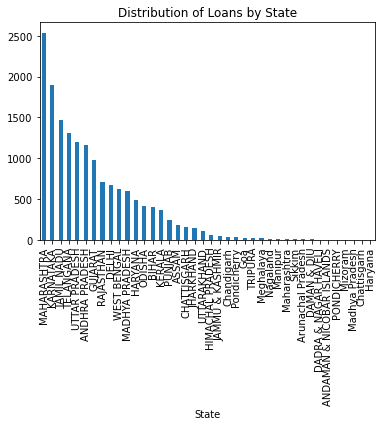

In [150]:
#Visualize loan by state
state_loan_counts.plot(kind='bar', title='Distribution of Loans by State')

2.Distribution of loans across different amounts

In [151]:
#group loans by loan amount
amount_loan_counts = portfolio_data.groupby('Loan Amount')['Loan Number'].count().sort_values(ascending=False)
amount_loan_counts 

Loan Amount
5000.0      6757
7000.0      3474
5017.0      1050
10000.0      643
6000.0       348
            ... 
9150.0         1
9162.0         1
9180.0         1
10060.0        1
240000.0       1
Name: Loan Number, Length: 304, dtype: int64

<AxesSubplot:title={'center':'Distribution of Loans by Amount'}, ylabel='Frequency'>

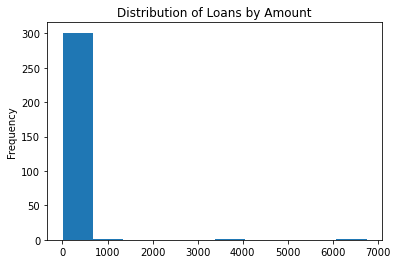

In [152]:
# Visulaize loans by loan amount using a histogram
amount_loan_counts.plot(kind='hist', title='Distribution of Loans by Amount')

3.Distribution of customers by age

In [153]:
age_dist = portfolio_data.groupby('Age')['State'].count().sort_values(ascending=False)
age_dist

Age
24     1208
26     1162
23     1161
25     1120
28     1043
27     1039
22      975
29      902
30      859
31      729
32      659
33      593
21      580
34      460
35      459
36      367
20      350
37      330
38      256
39      215
40      214
19      168
42      156
41      140
43      128
44      112
45       74
47       67
46       65
48       58
49       54
52       48
50       41
18       37
53       36
51       23
54       16
55       12
56        9
59        7
57        6
58        6
62        4
60        3
63        3
64        2
71        1
79        1
61        1
70        1
68        1
123       1
Name: State, dtype: int64

In [154]:
# Group the customers by age group
age_customer_counts = pd.cut(portfolio_data['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95]).value_counts()
age_customer_counts

(25, 35]    7905
(18, 25]    5562
(35, 45]    1992
(45, 55]     420
(55, 65]      41
(65, 75]       3
(75, 85]       1
(85, 95]       0
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Distribution of Customers by Age'}>

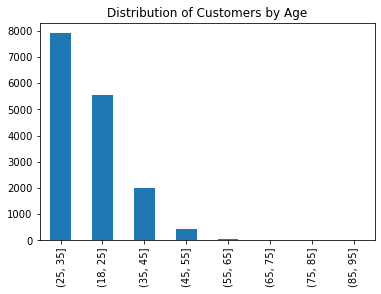

In [155]:
# Visualize customers by age using a bar chart
age_customer_counts.plot(kind='bar', title='Distribution of Customers by Age')

4.Distribution of loans by due dates

In [156]:
# Group the loans by due date
due_date_loan_counts = portfolio_data.groupby('Due Date')['Loan Number'].count().sort_values(ascending=False)
due_date_loan_counts

Due Date
25-11-2022    1080
19-11-2022    1077
02-11-2022    1000
01-11-2022     840
04-11-2022     821
05-11-2022     807
20-11-2022     786
06-11-2022     739
03-11-2022     730
21-11-2022     680
14-11-2022     667
12-11-2022     580
18-11-2022     577
15-11-2022     554
17-11-2022     534
08-11-2022     522
07-11-2022     506
11-11-2022     504
10-11-2022     498
16-11-2022     477
13-11-2022     472
09-11-2022     426
22-11-2022     362
24-11-2022     350
23-11-2022     316
26-11-2022      17
28-11-2022      15
27-11-2022      12
29-11-2022      11
31-10-2022       2
Name: Loan Number, dtype: int64

<AxesSubplot:title={'center':'Distribution of Loans by Due Date'}, xlabel='Due Date'>

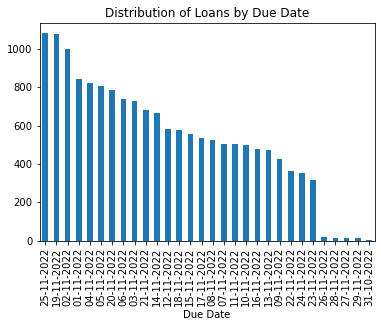

In [157]:
# Visualize loans by due date using a line chart
due_date_loan_counts.plot(kind='bar', title='Distribution of Loans by Due Date')

5. Unique number of customers contacted every day - only completed calls are to be considered - How many unique borrowers did we contact on day 1, day 2 etc.

In [158]:
# Filter the communication data to only include completed calls
completed_calls = communication_data[communication_data['Status'] == 'completed']
completed_calls

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status,Date
0,16748071234,161584404,21a1f7b1ce4d23d558e300626d5016c2,2022-12-02T02:59:40.973Z,completed,02-12-2022
1,16734601234,161584404,edecb5cd796826ef8bcde2f4814f16c2,2022-12-02T03:57:51.335Z,completed,02-12-2022
2,1631580,161307935,6a79ed24fa727ae9341f53a9df8816c2,2022-12-02T04:34:26.950Z,completed,02-12-2022
3,1631580,161307935,ce45ac657c26d5d10e6d1eb4aacc16c2,2022-12-02T04:34:57.213Z,completed,02-12-2022
4,1631580,161307935,6c864d7097f2df3eed4900ea892816c2,2022-12-02T04:36:21.594Z,completed,02-12-2022
...,...,...,...,...,...,...
70602,1505359,173536581,e00ab7123a2ec89f4ef8c752973016c7,2022-12-07T17:57:44.814Z,completed,07-12-2022
70603,1657882,173536581,4ad88b1f7ec7346435db29b5529916c7,2022-12-07T18:38:06.691Z,completed,07-12-2022
70604,1517330,173536581,41aab721f9e38552d5b688d8142816c8,2022-12-07T20:03:30.600Z,completed,07-12-2022
70605,1769119,172948100,c455574ddfbf0fcdec9399bf5b6b16c8,2022-12-07T20:05:00.526Z,completed,07-12-2022


In [160]:
grouped_calls = completed_calls.groupby(['Date', 'Loan Number'])
grouped_calls.mean()

Campaign ID
Date       Loan Number              
02-12-2022 872777       1.644152e+08
           894254       1.644152e+08
           896383       1.644152e+08
           901000       1.644152e+08
           901214       1.641686e+08
...                              ...
07-12-2022 1823885      1.729961e+08
           1823903      1.732423e+08
           1823931      1.735366e+08
           1823966      1.735366e+08
           1836875      1.729481e+08

[37087 rows x 1 columns]

In [162]:
unique_customers_per_day = grouped_calls['Loan Number'].nunique()
unique_customers_per_day = unique_customers_per_day.groupby('Date').sum()
unique_customers_per_day

Date
02-12-2022    7845
03-12-2022    6929
04-12-2022    6103
05-12-2022    6284
06-12-2022    5665
07-12-2022    4261
Name: Loan Number, dtype: int64

<AxesSubplot:title={'center':'unique number of customers contacted every day'}, xlabel='Date'>

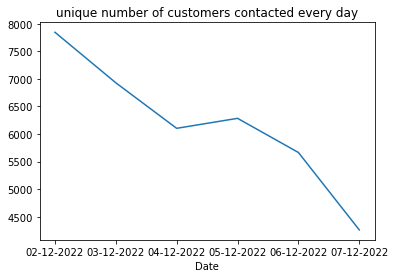

In [163]:
unique_customers_per_day.plot(kind='line', title='unique number of customers contacted every day')

6.Number of customers not contacted on every day. How many borrowers are not contacted on day 1, day 2 etc.

In [164]:
total_customers = portfolio_data.shape[0]
total_customers

15962

In [166]:
not_contacted = completed_calls.groupby('Date')['Loan Number'].nunique().apply(lambda x: total_customers - x).reset_index(name='not_contacted_count')
not_contacted

,Date,not_contacted_count
0,02-12-2022,8117
1,03-12-2022,9033
2,04-12-2022,9859
3,05-12-2022,9678
4,06-12-2022,10297
5,07-12-2022,11701


7.Who are the customers who have been contacted the most


In [167]:
# Group the communication history by customer ID and count the total number of calls
call_counts = communication_data.groupby('Loan Number')['Status'].count().reset_index(name='total_calls')

# Sort the customers by the number of calls
most_contacted = call_counts.sort_values('total_calls', ascending=False)
most_contacted.head()


,Loan Number,total_calls
3392,1659081,38
1749,1580447,30
1147,1542440,28
1429,1564892,28
7436,1759399,27


8.Who are the customers who have been contacted the least

In [168]:
least_contacted = call_counts.sort_values('total_calls', ascending=True)
least_contacted.head()

,Loan Number,total_calls
11219,16748071234,1
6627,1740829,1
9126,1793349,1
9127,1793356,1
9129,1793419,1


9.How many customers have never been reached out?

In [171]:
# Merge the two files based on the loan number
merged_data = pd.merge(portfolio_data, communication_data, on = 'Loan Number', how='left')
merged_data

,Loan Number,Due Date,State,DOB,Loan Amount,Age,Campaign ID,Communication Operator Message ID,Call time,Status,Date
0,1003431,31-10-2022,KARNATAKA,1987.0,240000.0,36,166790104.0,dc1c8ea862eaeba0c7b805b54b7c16c3,2022-12-03T13:16:04.150Z,completed,03-12-2022
1,1003431,31-10-2022,KARNATAKA,1987.0,240000.0,36,167104482.0,ffbd6015d04ebad7bba69b01d20316c4,2022-12-04T05:50:06.501Z,completed,04-12-2022
2,1003431,31-10-2022,KARNATAKA,1987.0,240000.0,36,167820924.0,5f09e4392238cfa97478ff9f7a5616c4,2022-12-04T08:54:15.613Z,completed,04-12-2022
3,1003431,31-10-2022,KARNATAKA,1987.0,240000.0,36,168389540.0,6bb2f3df55050c400ff7fe3b446316c4,2022-12-04T13:04:32.924Z,completed,04-12-2022
4,1003431,31-10-2022,KARNATAKA,1987.0,240000.0,36,168801291.0,1ab943780657353aa727ac909fbf16c5,2022-12-05T04:48:55.139Z,completed,05-12-2022
...,...,...,...,...,...,...,...,...,...,...,...
75338,946445,27-11-2022,UTTAR PRADESH,1989.0,75000.0,33,166203285.0,cdebf6ea3bb780c9e2acccbbb93716c3,2022-12-03T10:36:10.175Z,completed,03-12-2022
75339,946445,27-11-2022,UTTAR PRADESH,1989.0,75000.0,33,166790108.0,a278aaddfb1ce676004a3a5a3b9e16c3,2022-12-03T13:46:45.964Z,completed,03-12-2022
75340,946445,27-11-2022,UTTAR PRADESH,1989.0,75000.0,33,167104488.0,b267f2738015ac7faf84a95e641916c4,2022-12-04T05:08:10.325Z,completed,04-12-2022
75341,946445,27-11-2022,UTTAR PRADESH,1989.0,75000.0,33,167820915.0,9f3b001ab44ff7882a6cb2eecd3116c4,2022-12-04T09:18:26.231Z,completed,04-12-2022


In [173]:
# number of rows where the call status is null or NaN
num_unreached_customers = merged_data[merged_data['Status'].isnull()]['Loan Number'].nunique()
print('Number of customers who have never been reached out:', num_unreached_customers)

Number of customers who have never been reached out: 4752


10.Distribution of calls by states.

In [177]:
# Group the calls by state and count the number of calls in each group
calls_by_state = merged_data.groupby('State')['Loan Number'].count().sort_values(ascending=False)
calls_by_state

State
MAHARASHTRA                  11056
KARNATAKA                     9408
TAMIL NADU                    7599
TELANGANA                     6391
ANDHRA PRADESH                5775
UTTAR PRADESH                 5663
GUJARAT                       4562
RAJASTHAN                     3510
DELHI                         3013
MADHYA PRADESH                2959
WEST BENGAL                   2507
HARYANA                       2276
BIHAR                         2091
ODISHA                        1938
KERALA                        1655
PUNJAB                        1194
ASSAM                          816
CHATTISGARH                    690
JHARKHAND                      676
UTTARAKHAND                    369
HIMACHAL PRADESH               238
JAMMU & KASHMIR                209
Pondicherry                    178
Chandigarh                     122
TRIPURA                         99
Goa                             67
Manipur                         56
Meghalaya                       43
DAMAN & DIU   

<AxesSubplot:title={'center':'Distribution of Calls by State'}, xlabel='State'>

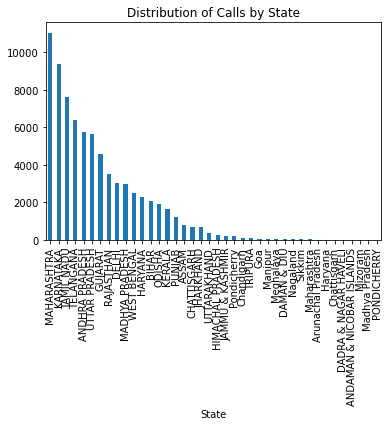

In [179]:
# Plot a bar chart of the distribution of calls by states
calls_by_state.plot(kind='bar', title='Distribution of Calls by State')

11.Distribution of calls by campaign ids

In [182]:
calls_by_campaign_ids = merged_data.groupby('Campaign ID')['Loan Number'].count().sort_values(ascending=False)
calls_by_campaign_ids 

Campaign ID
164168595.0    6905
164661895.0    6413
165448984.0    3736
170181308.0    3637
168801291.0    3545
167104482.0    3416
166203288.0    3391
166790104.0    3286
170740199.0    3279
168389540.0    3106
171446618.0    3045
169508126.0    3014
172117487.0    2973
172948100.0    2802
167820924.0    2692
165448976.0    1684
173536581.0    1632
166203285.0    1507
166790108.0    1467
172503470.0    1183
167104488.0    1068
168389543.0     945
168801293.0     878
167820915.0     797
170181312.0     694
169508122.0     660
170740200.0     554
171446611.0     501
172117491.0     495
172503471.0     486
173536583.0     466
172948097.0     316
169508129.0      11
167104481.0       5
172503474.0       2
Name: Loan Number, dtype: int64

<AxesSubplot:title={'center':'Distribution of Calls by Campaign IDs'}, xlabel='Campaign ID'>

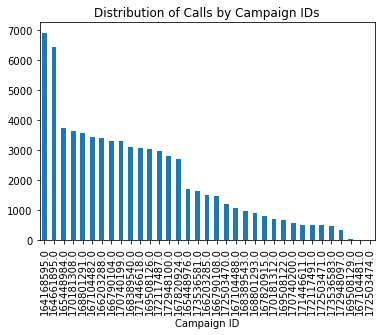

In [183]:
# Plot a bar chart of the distribution of calls by states
calls_by_campaign_ids.plot(kind='bar', title='Distribution of Calls by Campaign IDs')

12.Unique number of customers by campaign ID

In [186]:
# Group the data by CampaignID and count the number of unique borrowers
unique_customers_by_campaign = completed_calls.groupby("Campaign ID")["Loan Number"].nunique().sort_values(ascending=False)
unique_customers_by_campaign

Campaign ID
164168595    6306
164661895    5833
165448984    3430
170181308    3419
168801291    3353
167104482    3227
166203288    3189
170740199    3128
166790104    3070
168389540    2925
171446618    2902
169508126    2878
172117487    2789
172948100    2663
167820924    2578
165448976    1576
173536581    1572
166203285    1450
166790108    1408
172503470    1134
167104488    1019
168389543     877
168801293     841
167820915     747
170181312     654
169508122     629
170740200     529
171446611     472
172503471     465
172117491     463
173536583     433
172948097     308
161584404       3
156594506       2
161310463       2
161307935       1
135474249       1
Name: Loan Number, dtype: int64